### grp

## Hands-On Machine Learning with Scikit-Learn & TensorFlow

## CHAPTER 3: Classification

## Binary Classifier:
-  distinguishing between 2 classes

## Performance Measures:
-  K-Fold Cross Validation Accuracy (**accuracy is not always a valid perf. measure especially when dealing with _skewed_ datasets where some classes are more frequent than others**)
-  Confusion Matrix:
    -  compare predictions with actual targets
    -  each _row_ represents an _actual class_
    -  each _column_ represents a _predicted class_
    -  _precision_ => (TP / TP + FP) **accuracy of the positive predictions**
    -  _recall or "true positive rate" or "sensitivity" (TPR)_ => (TP / TP + FN) ... **ratio of positive instances correctly detected by classifier**
    -  _f1 score_ => (TP / TP + (FN + FP) / 2) **harmonic mean of precision and recall; f1 will be high if precision/recall are high**
    -  _Figure 3-2_ **illustration of confusion matrix**
-  ROC [receiver operating characteristic] Curve:
    -  plots _true positive rate_ against _false positive rate_
    -  _sensitivity_ (recall) vs. 1 - _specificity_ (true negative rate)
-  AUC [area under curve]:
    -  a perfect classifier will have a ROC/AUC equal to 1
    -  a purely random classifier will have a ROC/AUC equal to 0.5

### Precision / Recall Tradeoff:

-  _Figure 3-3_ **illustration of decision threshold and precision/recall tradeof**
-  the higher the recall (true positive rate) the more false positives the classifier produces

#### Rule of Thumb => prefer the PR curve whenever the _positive class_ is rare or when you care more about the false positives than the false negatives

## Mutliclass "Multinomial" Classification:
-  distinguishing between more than 2 classes
-  methods:
    -  train N binary classifiers for each class (one-versus-all) strategy:
        -  computes a decision score from each classifier where highest score can be used to classify label based on score
        -  works best on _large training sets_
    -  train N binary classifiers for each pair (one-versus-one) strategy:
        -  trains ... N x (N-1) / 2 ... classifiers
        -  works best on _small training sets_

## Multioutput Classification:
-  a multilabel classification
-  each label can be multiclass [ex: it can have more than 2 possible values]

## _Exercises_

In [1]:
import sklearn
print(sklearn.__version__)

0.20.0


### retrieve mnist data

In [2]:
from six.moves import urllib
from sklearn.datasets import fetch_mldata
try:
    mnist = fetch_mldata('MNIST original')
except urllib.error.HTTPError as ex:
    print("Could not download MNIST data from mldata.org, trying alternative...")

    # Alternative method to load MNIST, if mldata.org is down
    from scipy.io import loadmat
    mnist_alternative_url = "https://github.com/amplab/datascience-sp14/raw/master/lab7/mldata/mnist-original.mat"
    mnist_path = "./mnist-original.mat"
    response = urllib.request.urlopen(mnist_alternative_url)
    with open(mnist_path, "wb") as f:
        content = response.read()
        f.write(content)
    mnist_raw = loadmat(mnist_path)
    mnist = {
        "data": mnist_raw["data"].T,
        "target": mnist_raw["label"][0],
        "COL_NAMES": ["label", "data"],
        "DESCR": "mldata.org dataset: mnist-original",
    }
    print("Success!")

/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


### mnist schema:
-  _DESCR_ key describing the dataset
-  _data_ key containing an array w/ one row per instance and one column  per feature
-  _target_ key containing an array w/ the labels

In [3]:
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [4]:
X, y = mnist["data"], mnist["target"]
print(X.shape) # 70,000 images w/ 784 features
print(y.shape) # 70,000 labels

(70000, 784)
(70000,)


In [5]:
# each image is 28x28 pixels hence why there are 70,000 images
28*28

784

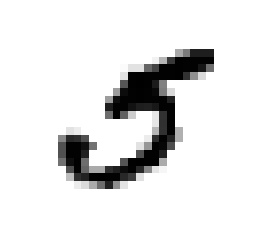

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = X[36000]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
plt.axis("off")

plt.show()

In [7]:
y[36000]

5.0

### train / test / split data

In [8]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [9]:
print("X train count: " + str(len(X[:60000])))
print("X test count: " + str(len(X[60000:])))
print("y train count: " + str(len(y[:60000])))
print("y test count: " + str(len(y[60000:])))

X train count: 60000
X test count: 10000
y train count: 60000
y test count: 10000


### shuffle training set for better CV folds

In [10]:
import numpy as np

# results will be different everytime when re-running notebook due to random shuffle of dataset

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

### binary classifier (ex: true [=5]; false[!=5]

In [11]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [12]:
print(y_train_5)
print(y_test_5)

[False False  True ... False  True False]
[False False False ... False False False]


In [13]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
sgd_clf.predict([some_digit])

array([False])

### manual cross validation via statifield sampling:
-  performs stratifield sampling to produce folds that contain a representative ratio of each class
-  at each iteration the code creates a clone of the classifier, trains that clone on the training folds, and makes predictions on the test fold
-  then it counts the number of correct predictions and outputs the ratio of correct predictions => **accuracy perf. measure**
-  https://en.wikipedia.org/wiki/Stratified_sampling


In [15]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_i, test_i in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_i]
    y_train_folds = (y_train_5[train_i])
    X_test_fold = X_train[test_i]
    y_test_fold = (y_train_5[test_i])

    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))

0.96325
0.9534
0.9631


### sklearn cross validation function evaluation scores

In [16]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring="accuracy")

array([0.96325, 0.9534 , 0.9631 ])

### sklearn cross validation function prediction values

In [17]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [18]:
y_train_pred # returns predictions on test fold

array([False,  True,  True, ..., False,  True, False])

### confusion matrix => https://en.wikipedia.org/wiki/Confusion_matrix

In [19]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5, y_train_pred)

# first row => non-5-images (negative FALSE class label)
# top left cell => correctly classified (true negatives)
# top right cell => wrongly classified (false positives)

# second row => 5-images (positive TRUE class label)
# botton left cell => wrongly classified (false negatives)
# botton right cell => correctly classified (true positives)

array([[53368,  1211],
       [ 1194,  4227]])

In [20]:
y_train_perfect_predictions = y_train_5
confusion_matrix(y_train_5, y_train_perfect_predictions)

# top left => number of negative class in dataset
# botton right => number of postive class in dataset

array([[54579,     0],
       [    0,  5421]])

### precision / recall => https://en.wikipedia.org/wiki/Precision_and_recall

In [21]:
from sklearn.metrics import precision_score, recall_score

print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.7773078337624126
0.7797454344216934


In [60]:
# manually calculate precision
print(4227 / (4227 + 1211))
# manually calculate recall
print(4227 / (4227 + 1194))

0.7773078337624126
0.7797454344216934


### f1 score => https://en.wikipedia.org/wiki/F1_score

In [23]:
from sklearn.metrics import f1_score
f1_score(y_train_5, y_train_pred)

0.7785247260337047

In [61]:
# manually calculate f1 score
print(4227 / (4227 + (1194 + 1211)/2))

0.7785247260337047


### decision threshold + precision/recall plot

In [25]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-2156.74276651])

In [26]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)

In [27]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [28]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
                             method="decision_function")

In [29]:
y_scores.shape

(60000,)

In [30]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

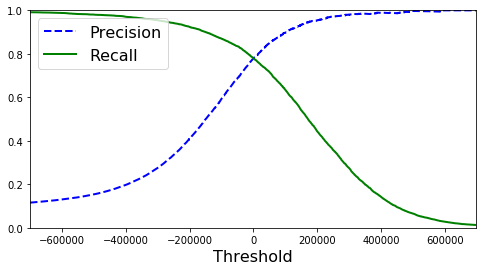

In [31]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
plt.show()

In [32]:
y_train_pred_90 = (y_scores > 70000)

In [33]:
precision_score(y_train_5, y_train_pred_90)

0.8692596063730085

In [34]:
recall_score(y_train_5, y_train_pred_90)

0.6843755764619074

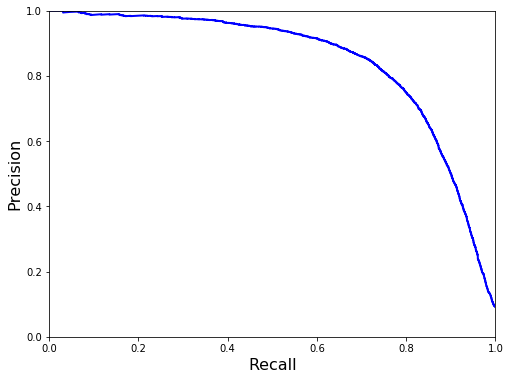

In [35]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

### roc curve plot

In [36]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

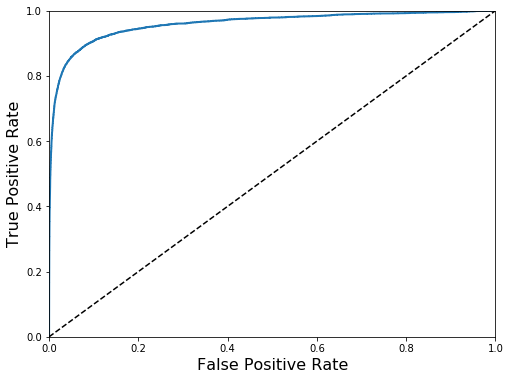

In [37]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [38]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_train_5, y_scores)

0.9594117855236548

In [39]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42, n_estimators=10)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [40]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

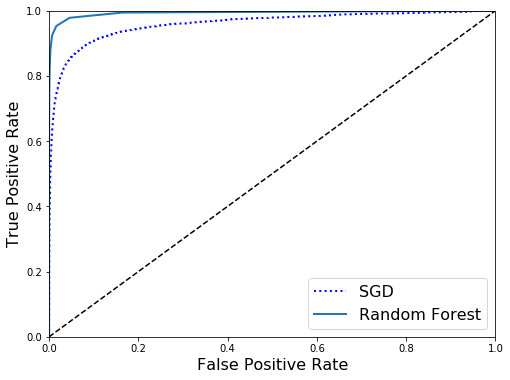

In [41]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, "b:", linewidth=2, label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right", fontsize=16)
plt.show()

In [42]:
roc_auc_score(y_train_5, y_scores_forest)

0.9932882922148303

In [43]:
y_train_pred_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3)
precision_score(y_train_5, y_train_pred_forest)

0.9836536337530374

In [44]:
recall_score(y_train_5, y_train_pred_forest)

0.821435159564656

### multiclass classification:
-  OvA
-  OvO

In [45]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

array([3.])

#### under the hood => sklearn trains 10 binary classifiers; computes decision score for the image; selects class with highest score

In [46]:
# OvA
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores # 9 different scores for all 10 classes [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

array([[ -55606.06180694, -577289.26857688, -415721.914159  ,
         179763.47830929, -374658.15190927,   -2156.74276651,
        -715349.01112535, -318006.29963741, -864919.35420888,
        -621498.99900564]])

In [47]:
np.argmax(some_digit_scores)

3

In [48]:
sgd_clf.classes_

array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.])

In [49]:
# OvO
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

array([5.])

In [50]:
len(ovo_clf.estimators_)

45

### random forest multiclassifier

In [51]:
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

array([5.])

In [52]:
# probabilities classifier assigned to each instance for each class [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
forest_clf.predict_proba([some_digit])
# model estimates a 90% probability that the image represents a 5 class / 10% image represents a 3

array([[0. , 0. , 0. , 0.1, 0. , 0.9, 0. , 0. , 0. , 0. ]])

In [53]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

array([0.87507499, 0.87434372, 0.86943041])

In [54]:
# scaling the inputs improves the accuracy
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.90831834, 0.90699535, 0.91443717])

### multiclassifier confusion matrix

In [55]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5734,    2,   18,   11,   10,   46,   47,   11,   41,    3],
       [   1, 6468,   44,   25,    7,   44,    7,   10,  123,   13],
       [  55,   33, 5301,  105,   82,   24,  105,   61,  177,   15],
       [  46,   42,  134, 5343,    3,  238,   33,   55,  143,   94],
       [  21,   28,   31,   10, 5375,   12,   49,   31,   78,  207],
       [  72,   43,   31,  167,   74, 4632,  115,   29,  174,   84],
       [  33,   24,   39,    2,   44,   94, 5630,    5,   46,    1],
       [  23,   21,   69,   27,   47,   12,    6, 5827,   17,  216],
       [  54,  144,   71,  141,   16,  153,   53,   27, 5059,  133],
       [  42,   31,   29,   83,  164,   40,    3,  252,   79, 5226]])

### image representation confusion matrix

In [56]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

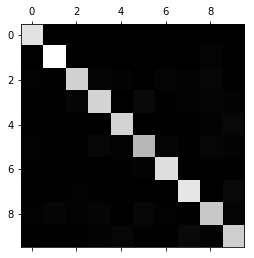

In [57]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()
# diagonal line indicates most classes were predicted correctly

### error rate

In [58]:
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums

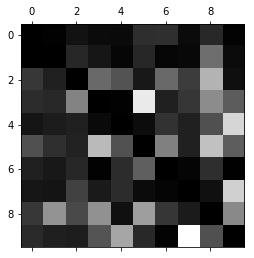

In [59]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()
# dark squares indicate classes were mostly classified correctly
# light squares indicate classes were mostly classified incorrectly

### additional exercises:

https://github.com/ageron/handson-ml/blob/master/03_classification.ipynb

1. Try to build a classifier for the MNIST dataset that achieves over 97% accuracy on the test set. Hint: the KNeighborsClassifier works quite well for this task; you just need to find good hyperparameter values (try a grid search on the weights and n_neighbors hyperparameters).
2. Write a function that can shift an MNIST image in any direction (left, right, up, or down) by one pixel.5 Then, for each image in the training set, create four shifted copies (one per direction) and add them to the training set. Finally, train your best model on this expanded training set and measure its accuracy on the test set. You should observe that your model performs even better now! This technique of artificially growing the training set is called data augmentation or training set expansion.
3. Tackle the Titanic dataset. A great place to start is on Kaggle.
4. Build a spam classifier (a more challenging exercise): Download examples of spam and ham from Apache SpamAssassin’s public datasets. Unzip the datasets and familiarize yourself with the data format. Split the datasets into a training set and a test set. Write a data preparation pipeline to convert each email into a feature vector. Your preparation pipeline should transform an email into a (sparse) vector indicating the presence or absence of each possible word. For example, if all emails only ever contain four words, “Hello,” “how,” “are,” “you,” then the email “Hello you Hello Hello you” would be converted into a vector [1, 0, 0, 1] (meaning [“Hello” is present, “how” is absent, “are” is absent, “you” is present]), or [3, 0, 0, 2] if you prefer to count the number of occurrences of each word. You may want to add hyperparameters to your preparation pipeline to control whether or not to strip off email headers, convert each email to lowercase, remove punctuation, replace all URLs with “URL,” replace all numbers with “NUMBER,” or even perform stemming (i.e., trim off word endings; there are Python libraries available to do this). Then try out several classifiers and see if you can build a great spam classifier, with both high recall and high precision.

### grp